# DOWNLOAD LIBRARY MODULE

In [1]:
! pip install missingno

# IMPORT BASIC LIBRARY

In [2]:
import pandas as pd # library untuk preprocessing data
import numpy as np # library untuk preprocessing data khususnya numerical
import seaborn as sns # library untuk visualisasi data
import matplotlib.pyplot as plt # library untuk visualisasi data

import missingno as msno # library untuk check missing data
import warnings # library untuk acknowledge semua warning yg muncul
warnings.filterwarnings('ignore') 

# READ DATA

**Read data dari local computer**

In [3]:
df = pd.read_csv('D:\MyProject\Telco Churn Prediction\DATA\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head() # show 5 data teratas

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# DESCRIBE DATA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Pada experiment disini, kita memiliki row data sebanyak 7043 data dan coulumn features sebanyak 21 data. Datatype pada experiment disini terdiri dari float64(1), int64(2) dan object(18).**

**Penjelasan masing-masing kolom :**
- ID Pelanggan: ID Pelanggan
- jenis kelamin: jenis kelamin pelanggan (Pria/Wanita)
- seniorCitizen: apakah pelanggannya adalah warga senior (1/0)
- partner: apakah pelanggan mempunyai partner (Ya/Tidak)
- tanggungan: apakah pelanggan mempunyai tanggungan (Ya/Tidak)
- tenure: jumlah bulan pelanggan telah tinggal di perusahaan
- phoneService: apakah pelanggan memiliki layanan telepon (Ya/Tidak)
- multipleLines: apakah pelanggan memiliki banyak saluran (Ya/Tidak/Tidak ada layanan telepon)
- internetService: penyedia layanan internet pelanggan (DSL/Fiber optic/No)
- Keamanan online: apakah pelanggan memiliki keamanan online (layanan internet Ya/Tidak/Tidak)
- onlineBackup: apakah pelanggan memiliki cadangan online (layanan internet Ya/Tidak/Tidak)
- DeviceProtection: apakah pelanggan memiliki perlindungan perangkat (layanan internet Ya/Tidak/Tidak)
- techSupport: apakah pelanggan memiliki dukungan teknis (layanan internet Ya/Tidak/Tidak)
- streamingTV: apakah pelanggan memiliki TV streaming (layanan internet Ya/Tidak/Tidak)
- streamingMovies: apakah pelanggan memiliki film streaming (layanan internet Ya/Tidak/Tidak)
- kontrak: jangka waktu kontrak pelanggan (Bulan ke bulan/Satu tahun/Dua tahun)
- paperlessBilling: apakah pelanggan memiliki tagihan tanpa kertas (Ya/Tidak)
- metode pembayaran: metode pembayaran pelanggan (Cek elektronik/Cek pos/Transfer bank (otomatis)/Kartu kredit (otomatis))
- MonthlyCharges: jumlah yang dibebankan kepada pelanggan setiap bulan
- totalCharges: jumlah total yang dibebankan kepada pelanggan
- churn: apakah pelanggan melakukan churn (Ya/Tidak)

**Setelah dilakukan pengecekan data diatas, dapat disimpulkan ada kelainan dtype pada features TotalCharge.
Dimana data tersebut harusnya memiliki tipe data float64, akan tetapi masih teridentifikasi sebagi object64(string).**
**Perlu dilakukan perubahan pada dtype.**

In [6]:
# changing 'TotalCharges' object data type to float

df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric, errors='coerce')

In [7]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

**Saat ini dtype sudah diubah menjadi float64.**
**Selanjutnya, kita perlu melakukan drop data pada data yang tidak penting yaitu customerID.**

In [8]:
# Drop column customerID because not important
df = df.drop(['customerID'], axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


**Sekarang, kita memiliki row data sebanyak 7043 dan coulumn features sebanyak 20 data. Dimana untuk Datatype experiment disini terdiri dari float64(2), int64(2) dan object(16). Setelah melakukan perubahan pada datatype TotalCharges dapat dilihat terdapat kelainan pada total data rownya yaitu sebanyak 7032. Hal tersebut mengindikasikan terdapat *missing value* pada data tersebut. Untuk memastikan lebih detailnya akan dilakukan pengcekan *missing value* menggunakan missingno.**

# MISSING VALUE

## Check Missing Value

<Axes: >

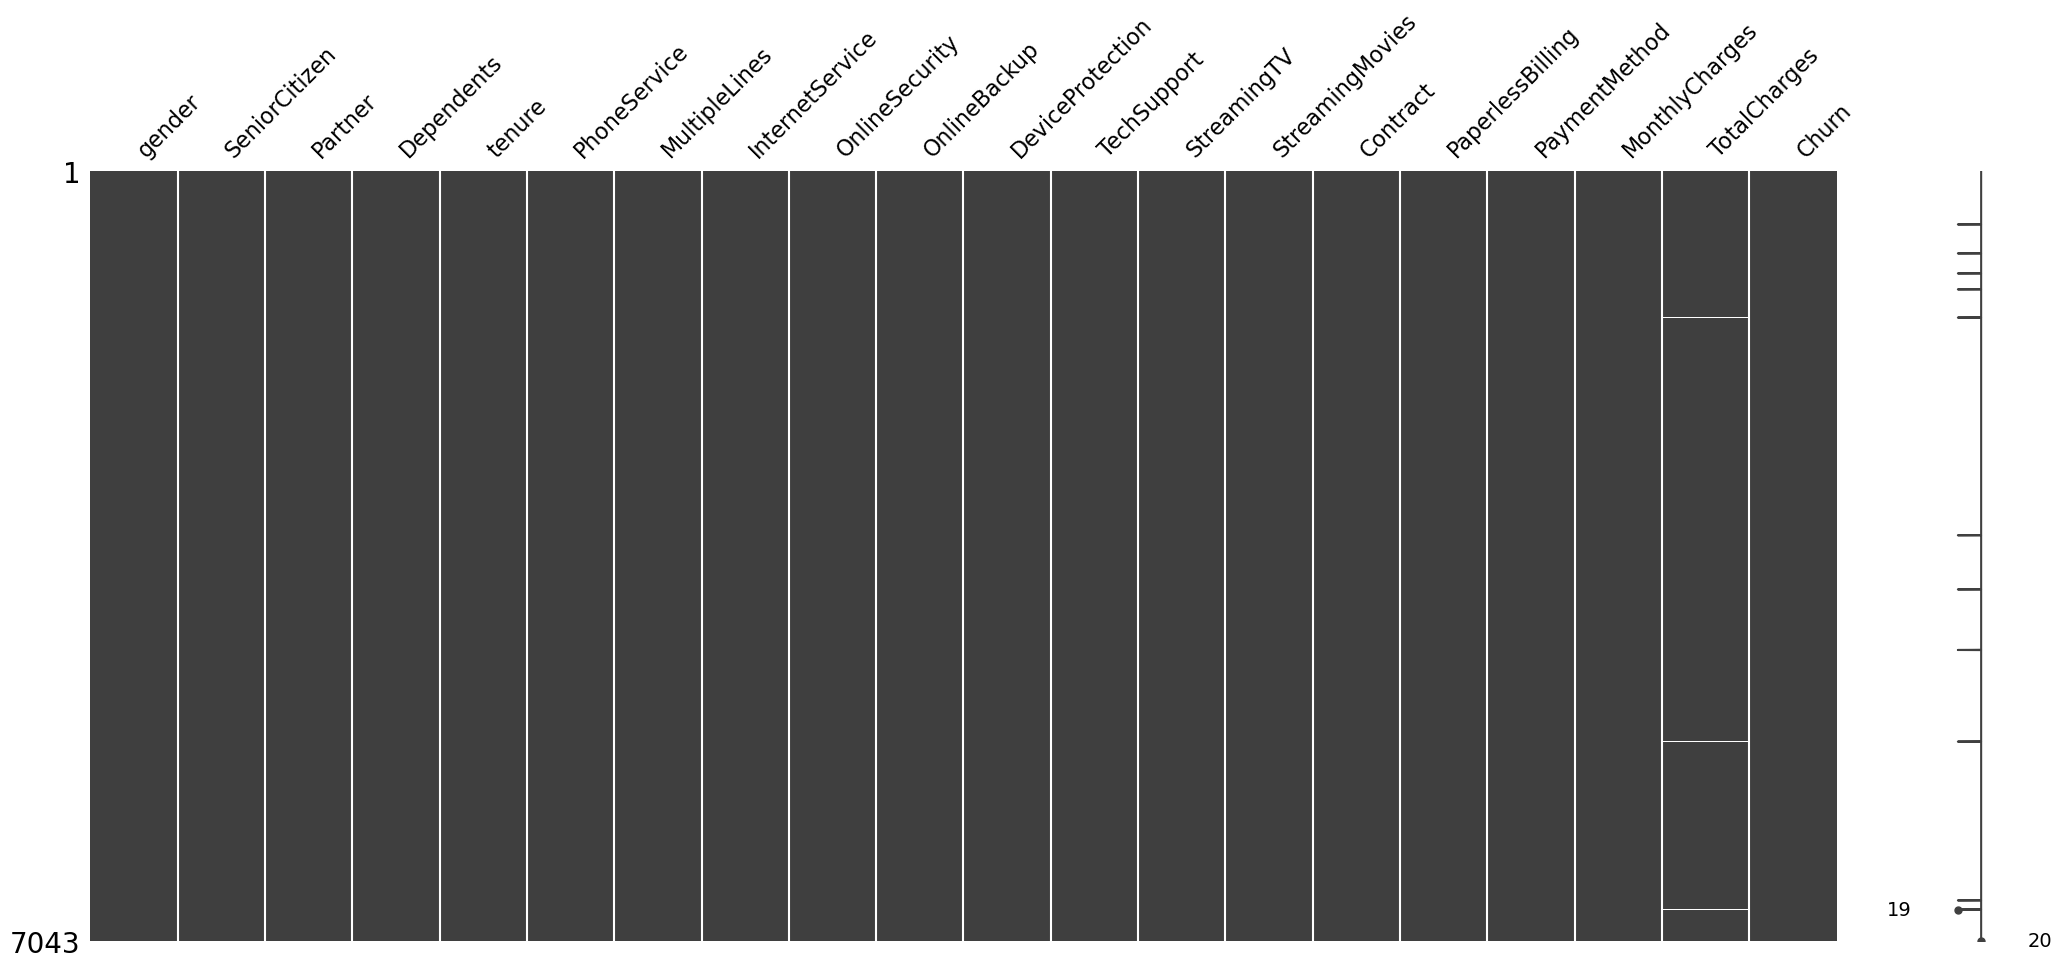

In [10]:
msno.matrix(df)

**Dari plot missingno yang disajikan diatas, dapat dilihat terdapat garis putih pada data TotalCharges, hal tersebut menandakan adanya *missing value* pada data tersebut. Selanjutnya kita pastikan total dari *missing value* serta melakukan handling dengan cara drop data row yang memiliki *missing value.***

In [11]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**Total data yang missing untuk feature TotalCharges sebanyak 11 Data**

## Handling Missing Value

**Saya akan melakukan handling missing value dengan drop data**

In [12]:
df = df.dropna()

In [13]:
# one more check data

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

**Dapat kita lihat sekarang kita memiliki total raw data sebanyak 7032. Selanjutnya, kita melakukan feature engineering pada data numerical dan categorical.**

In [15]:
print(df['Partner'].value_counts(ascending=True))

Partner
Yes    3393
No     3639
Name: count, dtype: int64


In [16]:
for i in df.columns:
    if df[i].dtypes=="object":
        print(f'{i} : {df[i].unique()}')
        print("****************************************************")

gender : ['Female' 'Male']
****************************************************
Partner : ['Yes' 'No']
****************************************************
Dependents : ['No' 'Yes']
****************************************************
PhoneService : ['No' 'Yes']
****************************************************
MultipleLines : ['No phone service' 'No' 'Yes']
****************************************************
InternetService : ['DSL' 'Fiber optic' 'No']
****************************************************
OnlineSecurity : ['No' 'Yes' 'No internet service']
****************************************************
OnlineBackup : ['Yes' 'No' 'No internet service']
****************************************************
DeviceProtection : ['No' 'Yes' 'No internet service']
****************************************************
TechSupport : ['No' 'Yes' 'No internet service']
****************************************************
StreamingTV : ['No' 'Yes' 'No internet service']
*******************

Above cell shows us the list of all features with their respective categorical variables

In [17]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

Replace long negative text by "No" for ease of access

In [18]:
for i in df.columns:
    if df[i].dtypes=="object":
        print(f'{i} : {df[i].unique()}')
        print("****************************************************")

gender : ['Female' 'Male']
****************************************************
Partner : ['Yes' 'No']
****************************************************
Dependents : ['No' 'Yes']
****************************************************
PhoneService : ['No' 'Yes']
****************************************************
MultipleLines : ['No' 'Yes']
****************************************************
InternetService : ['DSL' 'Fiber optic' 'No']
****************************************************
OnlineSecurity : ['No' 'Yes']
****************************************************
OnlineBackup : ['Yes' 'No']
****************************************************
DeviceProtection : ['No' 'Yes']
****************************************************
TechSupport : ['No' 'Yes']
****************************************************
StreamingTV : ['No' 'Yes']
****************************************************
StreamingMovies : ['No' 'Yes']
****************************************************
Contract : 

There are few features in which categorical variables are more than two and they are not "Yes" or "No" types

# FEATURE ENGINEERING

## NUMERICAL

MELAKUKAN FEATURE SCALLING PADA DATA NUMERIC AGAR DISTRIBUSI SAMA

In [20]:
# Perform feature scaling on the dataset NUMERIC using the fit_transform method
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()

num_col = ['tenure','MonthlyCharges', 'TotalCharges']
stan_scal = StandardScaler.fit_transform(df[num_col])

In [22]:
df_scaling = pd.DataFrame(stan_scal, columns=num_col)
df_scaling

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457
...,...,...,...
7027,-0.343137,0.664868,-0.129180
7028,1.612573,1.276493,2.241056
7029,-0.872808,-1.170004,-0.854514
7030,-1.158016,0.319168,-0.872095


## CATEGORICAL VARIABLES

### LABEL ENCODER

In [24]:
two_cate = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for i in two_cate:
    df[i].replace({"No":0, "Yes":1}, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [25]:
# Replaceing Male be 0 and Female by 1

df['gender'].replace({'Female':1,'Male':0},inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [48]:
df_bin = df.drop(['tenure', 'MonthlyCharges', 'TotalCharges', 'InternetService', 'Contract', 'PaymentMethod'  ], axis =1)

In [49]:
df_bin

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,1,1,0,0,0,0,1,1
3,0,0,0,0,0,0,1,0,1,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,1,1,1,0,1,1,1,1,1,0
7039,1,0,1,1,1,1,0,1,1,0,1,1,1,0
7040,1,0,1,1,0,0,1,0,0,0,0,0,1,0
7041,0,1,1,0,1,1,0,0,0,0,0,0,1,1


In [50]:
df_bin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            7032 non-null   int64
 1   SeniorCitizen     7032 non-null   int64
 2   Partner           7032 non-null   int64
 3   Dependents        7032 non-null   int64
 4   PhoneService      7032 non-null   int64
 5   MultipleLines     7032 non-null   int64
 6   OnlineSecurity    7032 non-null   int64
 7   OnlineBackup      7032 non-null   int64
 8   DeviceProtection  7032 non-null   int64
 9   TechSupport       7032 non-null   int64
 10  StreamingTV       7032 non-null   int64
 11  StreamingMovies   7032 non-null   int64
 12  PaperlessBilling  7032 non-null   int64
 13  Churn             7032 non-null   int64
dtypes: int64(14)
memory usage: 824.1 KB


### ONE-HOT-ENCODING 

In [30]:
ohe_col = ['InternetService', 'Contract', 'PaymentMethod']

In [47]:
from sklearn.preprocessing import OneHotEncoder

# Columns to be one-hot encoded
# columns_to_encode = ['Contract', 'InternetService','PaymentMethod']
# One-hot encoding
onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoded = onehot_encoder.fit_transform(pd.DataFrame(df)[ohe_col])

# Create a new DataFrame with one-hot encoded columns
df_onehot = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(ohe_col))
print(df)
print(df_onehot)
df.head()
df_onehot.head()

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          1              0        1           0       1             0   
1          0              0        0           0      34             1   
2          0              0        0           0       2             1   
3          0              0        0           0      45             0   
4          1              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       0              0        1           1      24             1   
7039       1              0        1           1      72             1   
7040       1              0        1           1      11             0   
7041       0              1        1           0       4             1   
7042       0              0        0           0      66             1   

      MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0                 0             DSL       

,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
df_merged = pd.concat(
    [
        df_scaling.reset_index(drop=True),
        df_onehot.reset_index(drop=True),
        df_bin.reset_index(drop=True)
    ],
    axis=1,
    ignore_index=True,
)

df_merged_columns = [
    list(df_scaling.columns),
    list(df_onehot.columns),
    list(df_bin.columns)
]

flatten = lambda nested_lists: [item for sublist in nested_lists for item in sublist]

df_merged.columns = flatten(df_merged_columns)

print(df_merged)

        tenure  MonthlyCharges  TotalCharges  InternetService_DSL  \
0    -1.280248       -1.161694     -0.994194                  1.0   
1     0.064303       -0.260878     -0.173740                  1.0   
2    -1.239504       -0.363923     -0.959649                  1.0   
3     0.512486       -0.747850     -0.195248                  1.0   
4    -1.239504        0.196178     -0.940457                  0.0   
...        ...             ...           ...                  ...   
7027 -0.343137        0.664868     -0.129180                  1.0   
7028  1.612573        1.276493      2.241056                  0.0   
7029 -0.872808       -1.170004     -0.854514                  1.0   
7030 -1.158016        0.319168     -0.872095                  0.0   
7031  1.368109        1.357932      2.012344                  0.0   

      InternetService_Fiber optic  InternetService_No  \
0                             0.0                 0.0   
1                             0.0                 0.0   


In [53]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   float64
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   InternetService_DSL                      7032 non-null   float64
 4   InternetService_Fiber optic              7032 non-null   float64
 5   InternetService_No                       7032 non-null   float64
 6   Contract_Month-to-month                  7032 non-null   float64
 7   Contract_One year                        7032 non-null   float64
 8   Contract_Two year                        7032 non-null   float64
 9   PaymentMethod_Bank transfer (automatic)  7032 non-null   float64
 10  PaymentMethod_Credit card (automatic)    7032 no

# DOWNLOAD CSV FILE

In [54]:
df_merged.to_csv('data_clean.csv', index=False)